In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import random
from random import randint
from random import seed

Import the dataset

In [2]:
dataset = pd.read_csv('wikigraph_reduced.csv', sep='\t', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1")

In [3]:
dataset.head()

,Unnamed: 0,0,1
0,796,95,1185516
1,909,108,1059989
2,910,108,1062426
3,911,108,1161925
4,1141,134,541222


In [4]:
dataset.columns

Index(['Unnamed: 0', '0', '1'], dtype='object')

Change the columns name; 0 is the **source** and 1 is the **target**

In [5]:
dataset.columns=['Index','Source','Target']

Make the first column the index

In [6]:
dataset.set_index('Index' , inplace = True)

In [7]:
dataset.head()

,Source,Target
Index,,
796,95,1185516
909,108,1059989
910,108,1062426
911,108,1161925
1141,134,541222


### RQ1. Create the graph
Create two dictionaries for the nodes of the graph; one is for the indegree node, the other one is for the outdegree node. Note that the dictionaries contain the unique element.

In [8]:
in_degree = {v: [] for v in set(dataset.Source)}
out_degree = {v: [] for v in set(dataset.Target)}

In [9]:
for row in dataset.iterrows():
    source = row[1][0]
    target = row[1][1]
    in_degree[source].append(target)
    out_degree[target].append(source)

In [10]:
in_degree[108]

[1059989, 1062426, 1161925]

Visualize how many indegree and outdegree has the graph

In [11]:
n_art_outlink = len(out_degree)
print(n_art_outlink)

75467


In [12]:
n_art_inlink = len(in_degree)
print(n_art_inlink)

90920


#### Is the graph directed?

In [13]:
if (len(set(dataset.Source).intersection(set(dataset.Target)))!=0):
     print ('The graph is directed')
    

The graph is directed


#### How many articles are we considering?

In [14]:
nodes = set(dataset.Source).union(set(dataset.Target))
n_nodes = len(nodes)
print(n_nodes)

98343


#### How many hyperlinks between pages exist?

In [15]:
n_edges = len(dataset)
print(n_edges)

483094


#### Compute the average number of links in an arbitrary page

In [16]:
import numpy as np

n_outlinks = []
for node in nodes:
    try:
        out_deg = len(out_degree[node])
    except:
        out_deg = 0
    n_outlinks.append(out_deg)
avg_outlink = np.mean(n_outlinks)
print(round(avg_outlink))

5


#### What is the graph density?
For directed graph the density is given by: $\frac{|E|}{|V|(|V|-1)}$



In [17]:
density = (n_edges/(n_nodes*(n_nodes-1)))
print(density)

4.9951571365597335e-05


#### The graph is dense or sparse?

In [18]:
print('Max number of edges:',n_nodes**2)
print('Number of edges: ',n_edges)

Max number of edges: 9671345649
Number of edges:  483094


The graph is sparse.

#### Visualize the nodes' degree distribution [To complete]

In [19]:
connections = []
for node in nodes:
    try:
        in_deg = len(in_degree[node])
    except:
        in_deg = 0
    try:
        out_deg = len(out_degree[node])
    except:
        out_deg = 0
    connections.append(in_deg+out_deg)

In [20]:
series=pd.Series(connections)

degrees=series.groupby(by=connections).count()
d_sum=np.sum(degrees)
degrees=degrees[0:50]   # the first 50 degrees values are enough to give a true representation
degrees=degrees/d_sum


degrees_sum=0

cdf_list=[]


for x in degrees:
    
    
    degrees_sum=(degrees_sum+x)
    
    
    cdf_list.append(degrees_sum)
    

<BarContainer object of 50 artists>

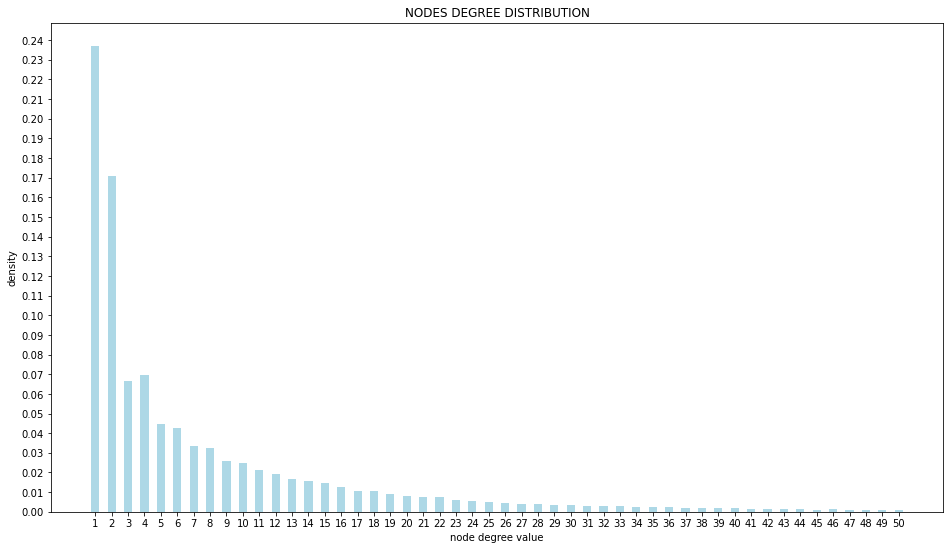

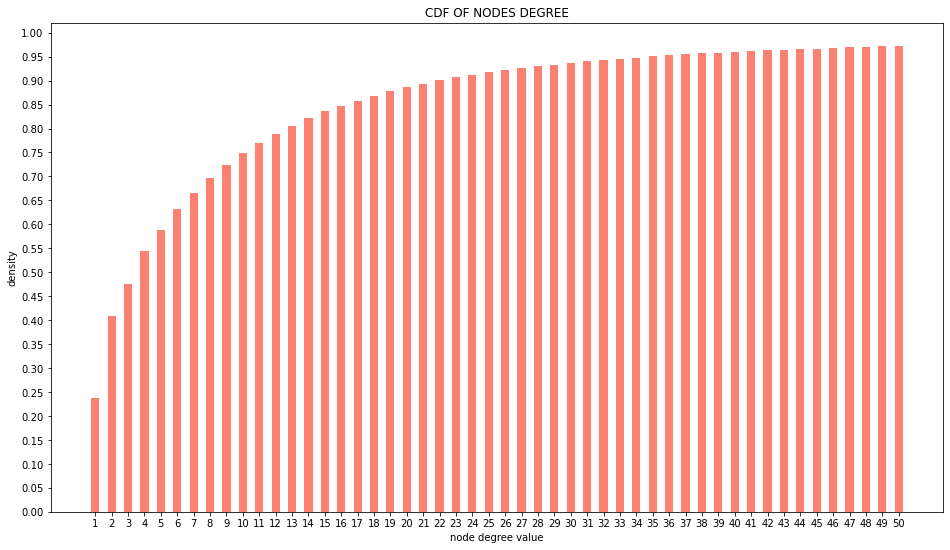

In [21]:
plt.figure(figsize=(16,9))

plt.xticks(np.arange(1,51,1))

plt.yticks(np.arange(0,1,0.01))

plt.xlabel('node degree value')

plt.ylabel('density')

plt.title('nodes degree distribution'.upper())

plt.bar(degrees.index,degrees,color='lightblue',width=0.5)








plt.figure(figsize=(16,9))

plt.xticks(np.arange(1,51,1))

plt.yticks(np.arange(0,1.05,0.05))

plt.xlabel('node degree value')

plt.ylabel('density')

plt.title('CDF of nodes degree'.upper())

plt.bar(degrees.index,cdf_list,color='salmon',width=0.5)




**transforming files**

In [37]:
f_pages=open('wiki-topcats-page-names.txt','r')
names=list(f_pages.readlines())

In [38]:
f_cat=open('wiki-topcats-categories.txt','r')
cat=list(f_cat.readlines())

In [39]:
def text_fix(names):
    
    for i in range(len(names)):
        
        names[i]=re.sub('\n','',names[i])
        
        names[i]=re.sub(f'^{str(i)}','',names[i]).lstrip()
        
    return names


In [25]:
page_names=text_fix(names)

In [687]:
#page_names

In [40]:
categories={v: [] for v in nodes} 
categories_file = {} 

for i in range(len(cat)):
    support_list=cat[i].split(' ')  
    support_list[-1]=support_list[-1][0:-2]  
    category=support_list[0][9:-1]
    cat_nodes = []
    for node in support_list[1:]:
        try:
            categories[int(node)].append(category)
        except:
            0
        try:
            node = int(node)
            if node in nodes:
                cat_nodes.append(node)
        except:
            if node in nodes:
                cat_nodes.append(node)
    
    if cat_nodes!=[]:    
        categories_file[category] = cat_nodes

## Filter the category dictionaries:

In [41]:
print(categories[108])#giving a page we can see the related category
print()
print(categories_file['Eli_Lilly_and_Company']) #giving a category we can see the associated pages

['Debut_albums']

[948021, 1055485, 1164028, 1715998]


In [42]:
categories_filtered={}

for node in categories.keys():
    try:
        rand_category = random.choice(categories[node])
        categories_filtered[node] = rand_category
    except:
        categories_filtered[node] = 'Nan'

In [688]:
#print(categories_filtered.keys())

In [44]:
categories_file_filtered = {category:[] for category in set(categories_filtered.values())}
for node in categories_filtered.keys():
    
    node.lower()
    try:
        categories_file_filtered[categories_filtered[node]].append(node)
    except:
        continue

In [689]:
#before filtering:
#print(categories_file['American_films'])

In [690]:
#After filtering:
#print(categories_file_filtered['American_films'])

## RQ4

In [628]:
import modules4 as mod

In [629]:
d=mod.transform_dict(categories_file_filtered)


**in the following cells the two categories for the subgraph are asked in input**

In [630]:
all_pages=mod.categories_input(d)

insert the first categoryameriCan fillms
insert the second categoryamerican film actor
the categories you are looking for is not in the categories considered or you wrote them wrongly.
press any character if you want to continue, otherwise press a digit s
insert the first categoryAmerican Films
insert the second categoryAmerican film actors


In [631]:
input_pages=mod.input_pages(all_pages,page_names)

insert the first page emile meyer
insert the second page harry cheshires
you have to insert two pages which are in the two categories
insert the first page EMILIE MEYER
you have to insert two pages which are in the two categories
insert the first page emilie meyer
you have to insert two pages which are in the two categories
insert the first page harry cheshires
you have to insert two pages which are in the two categories
insert the first page emilie meyer
you have to insert two pages which are in the two categories
insert the first page emile meyer
insert the second page harry cheshire


**creating the out_degree subgraph of the two categories given in input. This graph will include only pages which belong to the two categories**

In [632]:
out_d=mod.out_subgraph(all_pages,out_degree,d)

In [633]:
#out_d

**creating the in_degree subgraph of the two categories given in input. This graph will include only pages which belong to the two categories**

In [634]:
in_d=mod.in_subgraph(all_pages,in_degree,d)

In [635]:
#in_d

**calculating the set of links to remove, using BFS**

*test1. Using random nodes which belong to the subgraph*

In [636]:
start=random.choice(all_pages)
print(start)

end=random.choice(all_pages)
print(end)

print(f'start page is: {page_names[start]}')

print(f'end page is: {page_names[end]}')


mod.links_distance(in_d,start,end)

1048923
1074208
start page is: No Deposit, No Return
end page is: Beeson Carroll
the minimum set of pages to be removed 
 in order to disconnect the two pages is 
 [1059745, 121334, 1164540, 1246638, 1163690, 1165756, 627140, 1166880, 1163470]


*test2. Using arbitrary pages which belong to the subgraph*

In [637]:
mod.links_distance(in_d,334868,1162915)

the minimum set of pages to be removed 
 in order to disconnect the two pages is 
 [1057804, 1059745, 334880]


*given that the graph is directed it is possible that inverting the start page and the end page will be obtained a different result*

In [638]:
mod.links_distance(in_d,1162915,334868)

'the first page has no connections among the pages of the two categories considered'

*test 3 using input pages*

In [639]:
mod.links_distance(in_d,input_pages[0],input_pages[1])

'the starting page is connected with itself'

## Rq5

In [691]:
#categories_file_filtered.keys()

In [678]:
input_cat=mod.cat_input(d)

insert a category University of California
the category you are looking for is not in the categories considered or you wrote wrongly.
press any character if you want to continue, otherwise press a digit j
insert a category American film actors


In [692]:
#new_lista=d[input_cat]
#print('the pages relative to the input category are: ')
#for number in new_lista:
    
    #print(page_names[number])

In [680]:
d_cat={key:[] for key in categories_file_filtered.keys()}

#d_cat

**in the following function will be used the previous dictionary, where each key is a category name, in order to store the distances from each page of the category input to the other pages of the other categories. For each key there will be an empty list if there are no links at all between the two categories or a list of distances among the single pages in the two categories**

In [681]:
d_cat=mod.dictionary_distances(cat_distance,in_degree,new_lista,categories_filtered,d_cat)

100%|██████████| 2852/2852 [10:44<00:00,  4.42it/s]


**computing the median distance between category input and the others categories**

In [682]:
d_result=mod.median(d_cat)

**categories distance from the input category, ordered by median**

In [683]:
series=pd.Series(data=d_result).sort_values()
series.head(30)

Ivor_Novello_Award_winners                                      4.0
Royal_Shakespeare_Company_members                               4.0
American_billionaires                                           4.0
Pennsylvania_Democrats                                          4.0
American_Quakers                                                4.0
Infectious_disease_deaths_in_England                            4.0
Congressional_Gold_Medal_recipients                             4.0
Ohio_Republicans                                                4.0
New_Jersey_Democrats                                            4.0
20th-century_American_people                                    4.0
Grammy_Lifetime_Achievement_Award_winners                       4.0
Film_theorists                                                  4.0
Junior_college_men's_basketball_players_in_the_United_States    4.0
Australian_Roman_Catholics                                      4.0
American_people_of_Austrian-Jewish_descent      

In [684]:
series[-30:-1]

Bengali-language_films                                   12.0
Irish_barristers                                         12.0
Sportspeople_from_Buenos_Aires                           12.0
Rivers_of_the_Prut_subbasin                              12.0
Members_of_the_New_Hampshire_House_of_Representatives    12.0
CD_Castelln_footballers                                  12.0
U.C._Sampdoria_players                                   12.0
Expatriate_footballers_in_Hong_Kong                      12.0
A.C._Arezzo_players                                      13.0
People_from_Verona                                       13.0
People_from_Rosario,_Santa_Fe                            13.0
Footballers_at_the_1924_Summer_Olympics                  13.0
Ava_Futebol_Clube_players                                13.0
South_Korean_footballers                                 13.0
Telugu_actors                                            13.0
Ternana_Calcio_players                                   13.0
Ravenna_

In [685]:
series.describe()

count    3754.000000
mean        7.249600
std         1.700545
min         4.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
dtype: float64

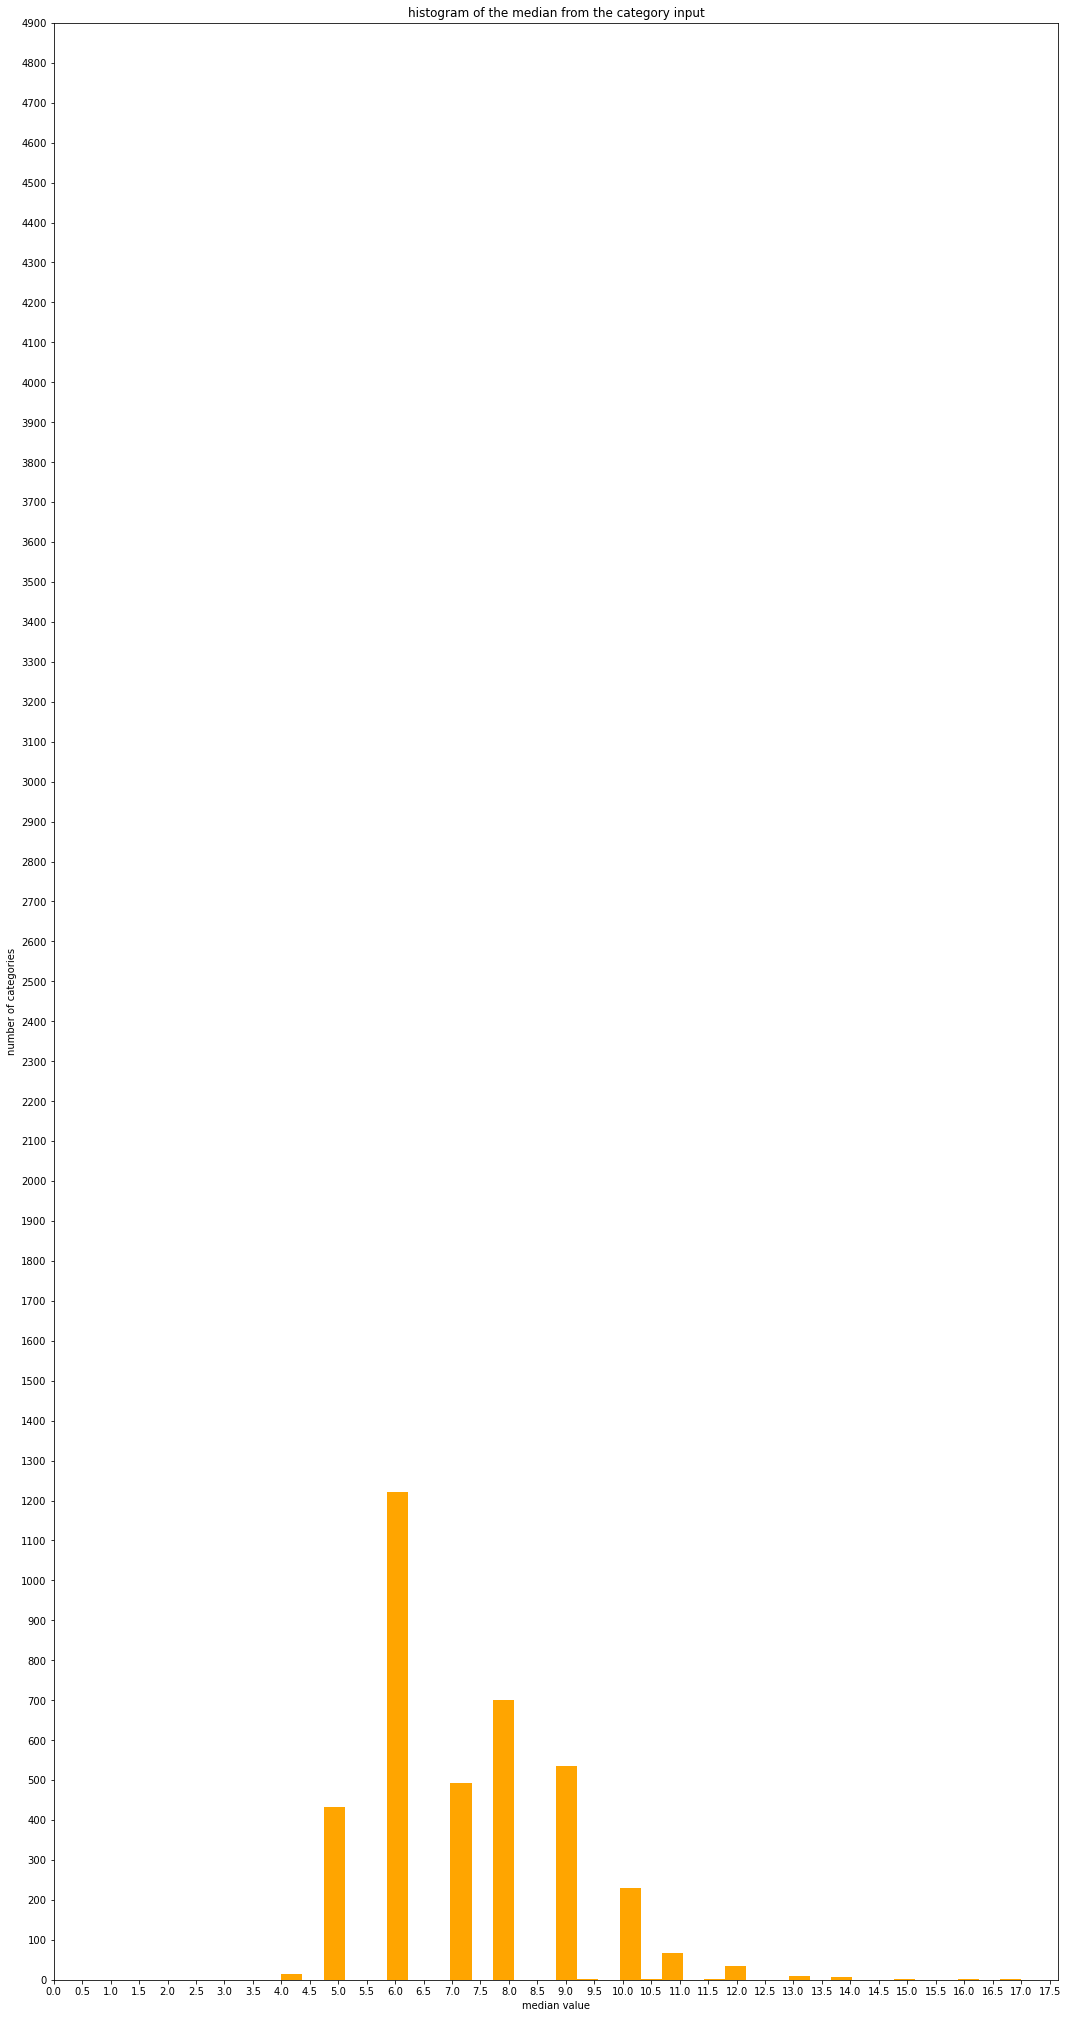

In [686]:
plt.figure(figsize=(18,36))

plt.title('histogram of the median from the category input')

plt.hist(series,color='orange',bins=35)

plt.xlabel('median value')

plt.xticks(np.arange(0,np.max(series)+1,0.5))

plt.yticks(np.arange(0,5000,100))

plt.ylabel('number of categories')


plt.show()